<a href="https://colab.research.google.com/github/vaidande/SoccerVsRugby-VGG16/blob/main/Soccer_Vs_Rugby_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [80]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [91]:
train_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/train',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))
val_data = image_dataset_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test',
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))

Found 2448 files belonging to 2 classes.
Found 610 files belonging to 2 classes.


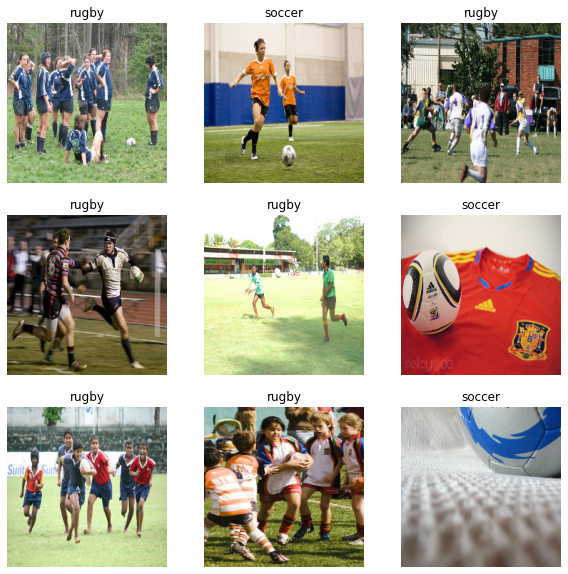

In [92]:
#visualizing some images..
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [93]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [94]:
train_dataset = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_dataset = val_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2448 images belonging to 2 classes.
Found 610 images belonging to 2 classes.


In [95]:
base_model = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [96]:
#freezing model..existing weights and biases will be NOT be trained!
base_model.trainable = False

In [97]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [98]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/train/*')

In [99]:
x = MaxPooling2D()(base_model.output)
x = Flatten()(x)
x = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [100]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [101]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model/soccervsrugby_xception.h5", monitor = metric, save_best_only=True, mode = 'auto', verbose = 1)

In [104]:
initial_epochs = 10
r = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=initial_epochs,
                        callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
77/77 [==============================] - 59s 769ms/step - loss: 0.3157 - accuracy: 0.8828 - val_loss: 0.4481 - val_accuracy: 0.8525

Epoch 00001: val_accuracy did not improve from 0.88689
Epoch 2/10
77/77 [==============================] - 59s 764ms/step - loss: 0.3738 - accuracy: 0.8770 - val_loss: 0.4919 - val_accuracy: 0.8672

Epoch 00002: val_accuracy did not improve from 0.88689
Epoch 3/10
77/77 [==============================] - 59s 764ms/step - loss: 0.3319 - accuracy: 0.8958 - val_loss: 0.5584 - val_accuracy: 0.8475

Epoch 00003: val_accuracy did not improve from 0.88689
Epoch 4/10
77/77 [==============================] - 59s 767ms/step - loss: 0.2990 - accuracy: 0.9003 - val_loss: 0.4344 - val_accuracy: 0.8787

Epoch 00004: val_accuracy did not improve from 0.88689
Epoch 5/10
77/77 [==============================] - 59s 762ms/step - loss: 0.2940 - accuracy: 0.8954 - val_loss: 0.7258 - val_accuracy: 0.8393

Epoch 00005: val_accuracy did not improve from 0.88689
Epoch

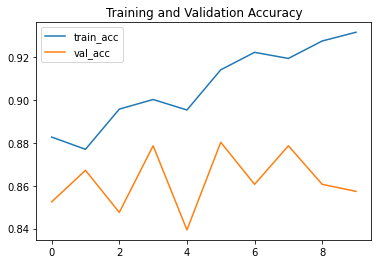

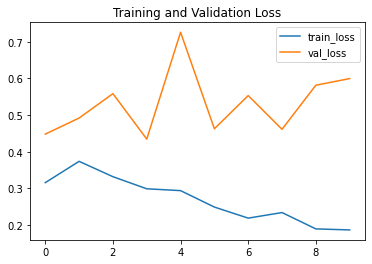

<Figure size 432x288 with 0 Axes>

In [109]:
acc1 = r.history['accuracy']
val_acc1 = r.history['val_accuracy']

loss1 = r.history['loss']
val_loss1 = r.history['val_loss']

plt.plot(acc1, label='train_acc')
plt.plot(val_acc1, label='val_acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

plt.plot(loss1, label='train_loss')
plt.plot(val_loss1, label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

In [110]:
base_lr = 0.001
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = base_lr/10), metrics=['accuracy'])

In [111]:
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

r_fine = model.fit_generator(train_dataset,
                        validation_data=val_dataset,
                        epochs=total_epochs,
                        initial_epoch = r.epoch[-1],
                        callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 10/20
77/77 [==============================] - 62s 780ms/step - loss: 0.1649 - accuracy: 0.9427 - val_loss: 0.4864 - val_accuracy: 0.8721

Epoch 00010: val_accuracy did not improve from 0.88689
Epoch 11/20
77/77 [==============================] - 59s 762ms/step - loss: 0.0999 - accuracy: 0.9630 - val_loss: 0.4909 - val_accuracy: 0.8639

Epoch 00011: val_accuracy did not improve from 0.88689
Epoch 12/20
77/77 [==============================] - 59s 761ms/step - loss: 0.0935 - accuracy: 0.9692 - val_loss: 0.5814 - val_accuracy: 0.8623

Epoch 00012: val_accuracy did not improve from 0.88689
Epoch 13/20
77/77 [==============================] - 59s 760ms/step - loss: 0.1143 - accuracy: 0.9570 - val_loss: 0.4810 - val_accuracy: 0.8738

Epoch 00013: val_accuracy did not improve from 0.88689
Epoch 14/20
77/77 [==============================] - 58s 754ms/step - loss: 0.0960 - accuracy: 0.9629 - val_loss: 0.4455 - val_accuracy: 0.8738

Epoch 00014: val_accuracy did not improve from 0.88689


In [112]:
acc += r_fine.history['accuracy']
val_acc += r_fine.history['val_accuracy']

loss += r_fine.history['loss']
val_loss += r_fine.history['val_loss']

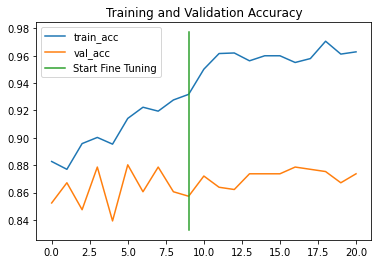

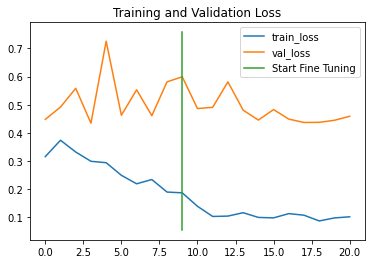

<Figure size 432x288 with 0 Axes>

In [113]:
plt.plot(acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.title('Training and Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

In [114]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/model/soccervsrugby_vgg16.h5')

In [115]:
test_image = image.load_img('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test/rugby/rugby.1,319.jpg', target_size=(224,224))
test_image1 = image.load_img('/content/gdrive/MyDrive/kaggle_dataset/SoccerVsRugby/input/test/soccer/rugby.1,252.jpg', target_size=(224,224))

In [116]:
test_img = image.img_to_array(test_image)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

test_img1 = image.img_to_array(test_image1)
test_img1 = test_img1/255
test_img1 = np.expand_dims(test_img1, axis = 0)
result1 = model.predict(test_img1)

In [117]:
a=np.argmax(result, axis=1)
b=np.argmax(result1, axis=1)

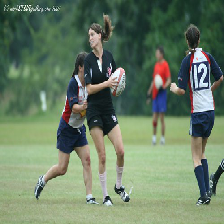

In [118]:
test_image

In [119]:
if a==0:
  print("Its a rugby game!")
else:
  print("Its a soccer game!")

Its a rugby game!


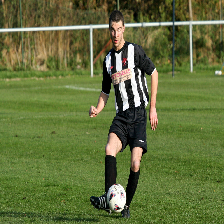

In [120]:
test_image1

In [121]:
if a==0:
  print("Its a rugby game!")
else:
  print("Its a soccer game!")

Its a rugby game!
